---
## Webserver
---

Bekijk het bijgeleverde bestand: "UofS_access_log".  Hierin staat een log van een webserver.  Iedere lijn bevat informatie over een request dat naar de server werd gestuurd.  Je vindt per request volgende informatie terug:

- de naam of ip-adres van de client
- het tijdstip
- de HTTP request die gebeurde
- de HTTP response code
- het aantal bytes in de response

---

- Lees het bestand in Python.

  - Zorg ervoor dat je slechts 5 kolommen overhoudt met de namen: "client", "date", "request", "response_code", "response_length".  
  - Vervang '-' in de response.length door 0

Gebruik 3 beduidende cijfers in je antwoorden.



In [7]:
import matplotlib.pyplot as plt

import pandas as pd
#,993113]
web = pd.read_csv('datasets/Uofs_access_log', sep=" ", header=None, skiprows=[990899,993112], encoding = "ISO-8859-1")
web.head()
timestamp = pd.Series(pd.to_datetime(web[[3,4]].apply(''.join, axis=1), format='[%d/%b/%Y:%H:%M:%S%z]'), name='timestamp')

web = web.drop(columns=[1,2,3,4])
web.columns=['client', 'request', 'response_code', 'response_length']
timestamp.dt.date
date = pd.Series(pd.to_datetime(timestamp.dt.date, format='%Y-%m-%d'), name = 'date')
web = web.join(date)
web['response_length'] = web.response_length.apply(lambda row: pd.to_numeric(row, errors='coerce'))
web.head()
web.info()

FileNotFoundError: ignored

### Oefening 1
Welke response code komt het meest voor?  Aan de hand van welke frequenties kan je dit zien?


In [ ]:
# schrijf hier je code
web.response_code.value_counts()

# met behulp van absolute frequenties
# de response code "200" komt het meest voor

### Oefening 2
Hoeveel procent van de requests bevat een response code die groter is dan 200?  Aan de hand van welke frequenties kan je dit berekenen?


In [ ]:
# schrijf hier je code
(web.response_code.value_counts(normalize=True)*100).round(1).sort_index().cumsum()

# aan de hand van cumulatieve frequentie van 200
# 8.9 % van de respons cod

200     91.1
302     92.8
304     99.1
400     99.1
401     99.1
403     99.1
404    100.0
500    100.0
501    100.0
Name: response_code, dtype: float64

### Oefening 3  

Hoeveel keer komt een response code 401 voor?  Aan de hand van welke frequenties kan je dit zien?  Wat betekent deze response code?


In [ ]:
#schrijf hier je code
web.response_code.value_counts().sort_index()

# response code komt 98 keer voor
# 401 is "Unauthorized" en wil zeggen dat iemand probeerde in te loggen 
# met verkeerde gegevens (https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)

### Oefening 4  

Welke documenten werden opgevraagd bij een response code 401?


In [ ]:
# schrijf hier je code
df_401 = pd.DataFrame(web[web.response_code == 401].request)

df_401.query('request.str.contains(".html")', engine='python').request


1802463                    GET /dcs/pts/record.html HTTP/1.0
2099472    GET /dcs/courses/cai/html/glossary/strong.html...
2099474    GET /dcs/courses/cai/html/introduction_lesson/...
2099478    GET /dcs/courses/cai/html/activities/edit_acti...
2099484    GET /dcs/courses/cai/html/glossary/strong.html...
2099500    GET /dcs/courses/cai/html/glossary/b.html HTTP...
2099502    GET /dcs/courses/cai/html/tools_lesson/lynx_ed...
2099512    GET /dcs/courses/cai/html/glossary/strong.html...
2099516    GET /dcs/courses/cai/html/examples/a_image.htm...
2099527    GET /dcs/courses/cai/html/tools_lesson/other_t...
2099531    GET /dcs/courses/cai/html/graphics_lesson/inde...
2099556        GET /dcs/courses/cai/html/index.html HTTP/1.0
2099573                  GET /dcs/courses/cai/html/ HTTP/1.0
2099650                  GET /dcs/courses/cai/html/ HTTP/1.0
2099666                         GET /dcs/index.html HTTP/1.0
2099792                  GET /dcs/courses/cai/html/ HTTP/1.0
2099859                 

### Oefening 5  

Welke clients probeerden ongeautoriseerd een document te raadplegen?


In [ ]:
# schrijf hier je code

web[web.response_code == 401].client.unique()

array(['suncap.usask.ca', 'cwis.usask.ca', 'skynet.usask.ca',
       'mercury115.terraport.net', 'ppp-4.pbmo.net', 's066n213.csun.edu',
       'louie.csun.edu', 'lithos.usask.ca', 'heidelberg.cle.ab.com',
       'sask.usask.ca', 'oa-c212-1.sheridanc.on.ca', 'duke.usask.ca',
       'andora.usask.ca', '198.169.132.92', 'pe4480.usask.ca',
       'piglet.usask.ca', 'dcs3017.usask.ca', 'manitou1_5.usask.ca',
       'humulus_lupulus.usask.ca'], dtype=object)

### Oefening 6  

Welke client probeerde het meest een ongeautoriseerd een document te raadplegen?


In [ ]:
# schrijf hier je code
web[web.response_code == 401].client.value_counts()


# skynet.usask.ca (25 keer)

skynet.usask.ca              25
cwis.usask.ca                20
duke.usask.ca                17
mercury115.terraport.net      6
andora.usask.ca               6
suncap.usask.ca               5
manitou1_5.usask.ca           3
dcs3017.usask.ca              2
piglet.usask.ca               2
ppp-4.pbmo.net                2
s066n213.csun.edu             2
198.169.132.92                1
sask.usask.ca                 1
pe4480.usask.ca               1
oa-c212-1.sheridanc.on.ca     1
louie.csun.edu                1
lithos.usask.ca               1
heidelberg.cle.ab.com         1
humulus_lupulus.usask.ca      1
Name: client, dtype: int64

### Oefening 7

Maak een taartdiagram van de response codes die niet gelijk zijn aan 200.


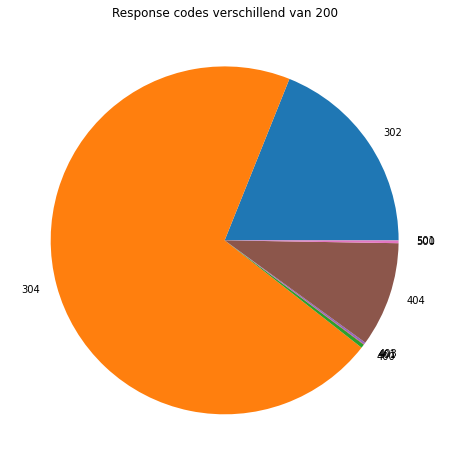

In [ ]:
# schrijf hier je code
series1 = web[web.response_code != 200].response_code.value_counts().sort_index()


fig, ax = plt.subplots(figsize=(8,8))
_ = ax.pie(series1.values, labels=series1.index)
_ = ax.set_title("Response codes verschillend van 200")




### Oefening 8  

Maak een staafdiagram van dezelfde response codes.  Merk het verschil op in leesbaarheid tussen deze en de vorige afbeelding


In [ ]:
series1

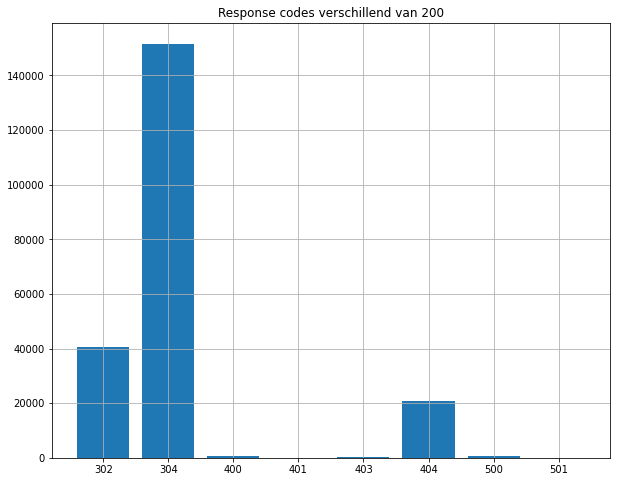

In [ ]:
# schrijf hier je code

fig, ax = plt.subplots(figsize=(10,8))
l = ["302", "304", "400", "401", "403", "404", "500", "501"]
_ = ax.bar(l, series1.values)
_ = ax.set_title("Response codes verschillend van 200")
ax.grid(True)

### Oefening 9  

Welke response code komt hier het meest voor?  Wat betekent deze response code?


In [ ]:
# schrijf hier je code


#code 304

#Dit zijn requests van browsers die vorige versies van pagina's bijhouden.



### Oefening 10  

Hoe groot is de langste response die gestuurd werd?  Welk bestand werd hier doorgestuurd?


In [ ]:
# schrijf hier je code

web[web.response_length == web.response_length.max()]

#30193824.0 bytes /uofs/ivany_movie.mov


,client,request,response_code,response_length,date
127004,mac40199.usask.ca,GET /uofs/ivany_movie.mov HTTP/1.0,200,30193824.0,1995-06-19
127629,duke.usask.ca,GET /uofs/ivany_movie.mov HTTP/1.0,200,30193824.0,1995-06-19
131615,agora.carleton.ca,GET /uofs/ivany_movie.mov HTTP/1.0,200,30193824.0,1995-06-20
144938,krause.usask.ca,GET /uofs/ivany_movie.mov HTTP/1.0,200,30193824.0,1995-06-21
161552,grapes.usask.ca,GET /uofs/ivany_movie.mov HTTP/1.0,200,30193824.0,1995-06-23
164035,palona1.cns.hp.com,GET /uofs/ivany_movie.mov HTTP/1.0,200,30193824.0,1995-06-23


### Oefening 11  

Selecteer alle regels waarbij response_length kleiner is dan 30 000 bytes.  Maak klassen van de response_length met klassenbreedte gelijk aan 1000 bytes, waarbij de linker-grens steeds bij de klasse hoort.  Hoeveel responses hebben een lengte kleiner dan 1000 bytes?


In [ ]:
# schrijf hier je code
web_30000 = web[web.response_length <= 30000]
cutpoints = range(0,31000,1000)
klassen = pd.cut(web_30000.response_length, right=False, bins=cutpoints)
klassen.value_counts().sort_index()

# 734949 hebben een response length kleiner dan 1000

[0, 1000)         734949
[1000, 2000)      569601
[2000, 3000)      286358
[3000, 4000)      225533
[4000, 5000)       89180
[5000, 6000)       75758
[6000, 7000)       76115
[7000, 8000)       32656
[8000, 9000)       14880
[9000, 10000)       7839
[10000, 11000)      9945
[11000, 12000)      7523
[12000, 13000)     12391
[13000, 14000)      4912
[14000, 15000)      8066
[15000, 16000)      2593
[16000, 17000)      6911
[17000, 18000)      3350
[18000, 19000)      2901
[19000, 20000)      4775
[20000, 21000)      2444
[21000, 22000)      3100
[22000, 23000)     47493
[23000, 24000)     18711
[24000, 25000)      6111
[25000, 26000)      9644
[26000, 27000)      1564
[27000, 28000)     10029
[28000, 29000)      4534
[29000, 30000)      2151
Name: response_length, dtype: int64

### Oefening 12  

Hoeveel procent van de responses zijn tussen de 1000 en 2000 bytes groot?


In [ ]:
# schrijf hier je code

(klassen.value_counts(normalize=True)*100).round(2).sort_index()

# 24.96 procent


[0, 1000)         32.21
[1000, 2000)      24.96
[2000, 3000)      12.55
[3000, 4000)       9.88
[4000, 5000)       3.91
[5000, 6000)       3.32
[6000, 7000)       3.34
[7000, 8000)       1.43
[8000, 9000)       0.65
[9000, 10000)      0.34
[10000, 11000)     0.44
[11000, 12000)     0.33
[12000, 13000)     0.54
[13000, 14000)     0.22
[14000, 15000)     0.35
[15000, 16000)     0.11
[16000, 17000)     0.30
[17000, 18000)     0.15
[18000, 19000)     0.13
[19000, 20000)     0.21
[20000, 21000)     0.11
[21000, 22000)     0.14
[22000, 23000)     2.08
[23000, 24000)     0.82
[24000, 25000)     0.27
[25000, 26000)     0.42
[26000, 27000)     0.07
[27000, 28000)     0.44
[28000, 29000)     0.20
[29000, 30000)     0.09
Name: response_length, dtype: float64

### Oefening 13  

Hoeveel procent van de responses zijn kleiner dan 6000 bytes?


In [ ]:
# schrijf hier je code

(klassen.value_counts(normalize=True)*100).round(2).sort_index().cumsum()[0:7]

# 86.89 procent

[0, 1000)       32.21
[1000, 2000)    57.17
[2000, 3000)    69.72
[3000, 4000)    79.60
[4000, 5000)    83.51
[5000, 6000)    86.83
[6000, 7000)    90.17
Name: response_length, dtype: float64

### Oefening 14  

Is een response van 5000-6000 bytes groot of klein?


In [ ]:
# schrijf hier je code

# groot, want 83,52% van de request is kleiner dan 5000 bytes

### Oefening 15  

Teken een barplot van de absolute frequenties


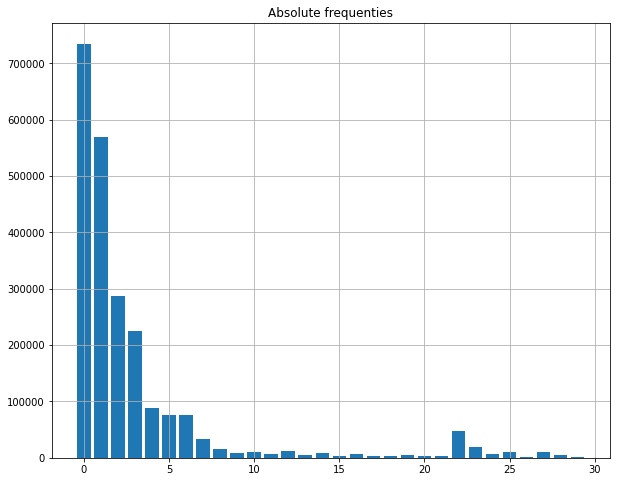

In [ ]:
# schrijf hier je code

x = klassen.value_counts().sort_index().to_numpy()

l = range(0,len(x))
fig, ax = plt.subplots(figsize=(10,8))

_ = ax.bar(l,x)
_ = ax.set_title("Absolute frequenties")
ax.grid(True)

### Oefening 16  

Teken een frequentiepolygoon van de absolute frequenties

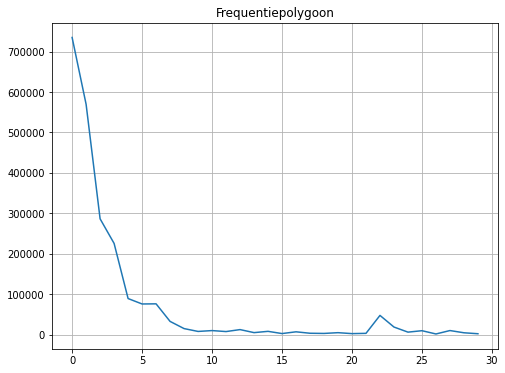

In [ ]:
# schrijf hier je code

x = klassen.value_counts().sort_index().to_numpy()
fig, ax = plt.subplots(figsize=(8,6))
_ = ax.plot(x, '-')
_ = ax.set_title("Frequentiepolygoon")
ax.grid(True)

### Oefening 17  

Teken een barplot van de cumulatieve frequenties

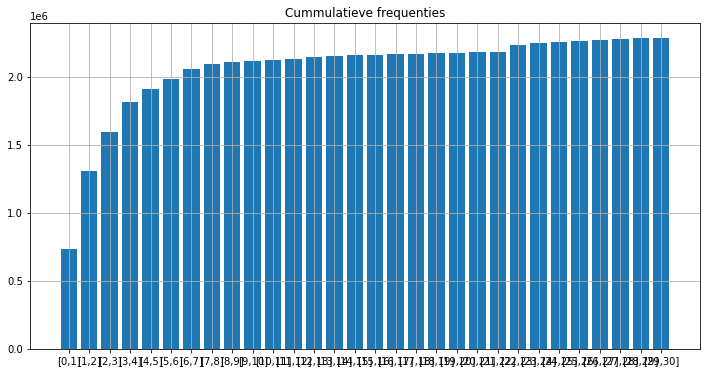

In [ ]:
# schrijf hier je code

x = klassen.value_counts().sort_index().cumsum().to_numpy()
l = ['['+str(i)+','+ str(i+1)+']' for i in range(0,30,1)] 
fig, ax = plt.subplots(figsize=(12,6))
_ = ax.bar(l,x)
_ = ax.set_title("Cummulatieve frequenties")
ax.grid(True)


### Oefening 18  

Maak een staafdiagram van de absolute frequenties van de datums.

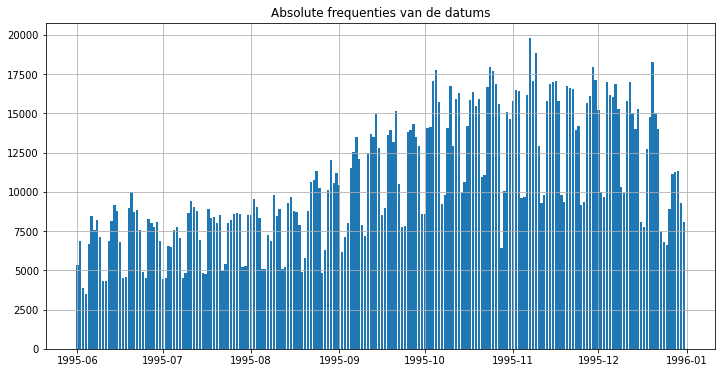

In [ ]:
# schrijf hier je code

x = web_30000.date.value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12,6))
_ = ax.bar(x.index,x)
_ = ax.set_title("Absolute frequenties van de datums")
ax.grid(True)



### Oefening 19  

Wat zie je?

In [ ]:
#De website wordt meer gebruikt in de week en minder in het weekend.  
#De website is populairder geworden in november en dan weer minder


